In [1]:
import pandas as pd
import numpy as np
import string
import re
from pprint import pprint

from scipy import sparse

import nltk, gensim, spacy
from nltk.util import ngrams
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

from textblob import TextBlob

from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models import Word2Vec, KeyedVectors
import gensim
from gensim import corpora

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics.pairwise import cosine_similarity

from wordcloud import *
from textblob import TextBlob
import pickle

import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.style as style
import matplotlib.pyplot as plt
import seaborn as sns

from operator import itemgetter
import time
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\past\types\oldstr.py:33: DeprecationWarning: invalid escape sequence \d
  """


In [2]:
job_df = pd.read_csv("data job posts.csv")
job_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
jobpost             19001 non-null object
date                19001 non-null object
Title               18973 non-null object
Company             18994 non-null object
AnnouncementCode    1208 non-null object
Term                7676 non-null object
Eligibility         4930 non-null object
Audience            640 non-null object
StartDate           9675 non-null object
Duration            10798 non-null object
Location            18969 non-null object
JobDescription      15109 non-null object
JobRequirment       16479 non-null object
RequiredQual        18517 non-null object
Salary              9622 non-null object
ApplicationP        18941 non-null object
OpeningDate         18295 non-null object
Deadline            18936 non-null object
Notes               2211 non-null object
AboutC              12470 non-null object
Attach              1559 non-null object
Year              

In [3]:
# Checking for duplicated rows since some were present in the initial inspection of the csv files
job_df[job_df.duplicated()]

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
189,"""Aregak"" Universal Credit Organization CJSC\nT...","Feb 5, 2013",Credit Officer in Ararat,"""Aregak"" Universal Credit Organization CJSC",NaN,NaN,All interested candidates,NaN,ASAP,"Long term, with 3 months probation period.",...,NaN,Please send your CVs to: vacancy@... or\ndeliv...,05-Feb-13,18-Feb-13,NaN,Aregak has started the activity as a microcred...,NaN,2013,2,False
1789,"""Public TV Company of Armenia"" CJSC\nTITLE: P...","May 14, 2013",Personal Assistant to Top Management Team,"""Public TV Company of Armenia"" CJSC",NaN,NaN,Individuals with at least 3 years of\nexperien...,NaN,NaN,NaN,...,NaN,CVs should be sent to the following e-mail\nad...,14-May-13,24-May-13,NaN,"""Public TV Company of Armenia"" CJSC is a state...",NaN,2013,5,False
5939,Career Center NGO\nTITLE: English Language Co...,"Feb 19, 2010",English Language Courses,Career Center NGO,NaN,NaN,Everyone,NaN,NaN,NaN,...,NaN,All interested candidates should visit Career\...,NaN,Rolling (Groups start their classes as soon as...,"When visiting our office for registration, ple...",Career Center NGO\nPhone/Fax: +(374 10) 560328...,The following attachment(s) to this announceme...,2010,2,False
5941,Career Center NGO\nTITLE: English Language Co...,"Feb 12, 2010",English Language Courses,Career Center NGO,NaN,NaN,Everyone,NaN,NaN,NaN,...,NaN,All interested candidates should visit Career\...,NaN,Rolling (Groups start their classes as soon as...,"When visiting our office for registration, ple...",Career Center NGO\nPhone/Fax: +(374 10) 560328...,The following attachment(s) to this announceme...,2010,2,False
6038,Career Center NGO\nTITLE: Receptionist/ Admin...,"Mar 15, 2013",Receptionist/ Administrative Assistant,Career Center NGO,NaN,Part-time or Full-time,Everyone,NaN,ASAP,NaN,...,NaN,"To apply for this position, please open\nwww.c...",15-Mar-13,29-Mar-13,This is an excellent opportunity especially fo...,NaN,NaN,2013,3,False
6213,Careline Cosmetic Products\nTITLE: Sales Mana...,"May 8, 2013",Sales Manager,Careline Cosmetic Products,NaN,NaN,NaN,NaN,NaN,NaN,...,"Fixed salary, plus bonus (about 100,000-150,00...","To apply, please send your CV (the name of the...",08-May-13,07-Jun-13,NaN,Careline Cosmetic Products are represented by ...,NaN,2013,5,False
6222,Cargomatrix Inc. Armenian Branch\nTITLE: .NET...,May-29,.NET Windows Mobile Developer,Cargomatrix Inc. Armenian Branch,NaN,Full-time,NaN,NaN,NaN,"Long term, with 3 months probation period.",...,"Market competitive, based on qualifications.","Please, email your professional CV to:armjobs@...",29-May-15,20-Jun-15,"Working hours are from 10 a.m. to 7p.m., flexi...",CargoMatrix is a logistics software solutions ...,NaN,2015,5,True
7136,Converse Bank CJSC\n\n\nTITLE: Leading Specia...,"Aug 24, 2015","Leading Specialist, Legal Department",Converse Bank CJSC,NaN,NaN,NaN,NaN,ASAP,NaN,...,NaN,Interested candidates who meet the mentioned\n...,24-Aug-15,31-Aug-15,NaN,"For information about Converse Bank CJSC, plea...",The following attachment(s) to this announceme...,2015,8,False
7356,Counterpart International Inc. Armenian Repres...,"Nov 3, 2011",Policy and Government Engagement Specialist,Counterpart International Inc. Armenian Repres...,NaN,NaN,NaN,NaN,Dec-11,1 year contract with 3 month probation period ...,...,NaN,"To apply, please send:\n- CV (highlighting rel...",03-Nov-11,21-Nov-11,NaN,Counterpart International Inc.-Armenia is the\...,NaN,2011,11,False
7817,Dom-Daniel Armenia\nTITLE: C/ C++ Software En...,"Dec 7, 2012",C/ C++ Software Engineer,Dom-Daniel Armenia,DDARM-120712-01,Full Time,All qualified candidates eligible to work\nin ...,NaN,"January, 2013","Long term, with 3 months probation period",...,Based on qualifications. Professional developm...,Please submit a resume and a cover letter tohr...,07-Dec-12,06-Jan-13,NaN,"Dom-Daniel Armenia, fou

In [4]:
# Dropping the 39 duplicate rows
job_df.drop_duplicates(inplace=True)
job_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18962 entries, 0 to 19000
Data columns (total 24 columns):
jobpost             18962 non-null object
date                18962 non-null object
Title               18934 non-null object
Company             18955 non-null object
AnnouncementCode    1206 non-null object
Term                7664 non-null object
Eligibility         4918 non-null object
Audience            638 non-null object
StartDate           9653 non-null object
Duration            10775 non-null object
Location            18930 non-null object
JobDescription      15076 non-null object
JobRequirment       16449 non-null object
RequiredQual        18481 non-null object
Salary              9604 non-null object
ApplicationP        18902 non-null object
OpeningDate         18258 non-null object
Deadline            18897 non-null object
Notes               2204 non-null object
AboutC              12439 non-null object
Attach              1556 non-null object
Year              

## Data Cleaning for the free text columns

__Following columns will be utilised for the analysis of the dataset:__
1. Title
2. Company
3. JobDescription
4. JobRequirment
5. RequiredQual
6. AboutC
7. Year
8. Month
9. IT
10. Location
11. jobpost


__Columns that will be cleaned and tokenized for their continued use throughout the business problems:__
1. JobDescription
2. JobRequirment
3. RequiredQual
4. AboutC
5. Location


__Columns that will be cleaned from unnecessary special characters and standardized:__
1. Company
2. Title

In [5]:
req_col = ["jobpost","Title","Company","JobDescription","JobRequirment","RequiredQual","AboutC","Year","Month","IT","Location"]
drop_col = job_df.columns.difference(req_col)
job_df.drop(drop_col,axis =1,inplace=True)
job_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18962 entries, 0 to 19000
Data columns (total 11 columns):
jobpost           18962 non-null object
Title             18934 non-null object
Company           18955 non-null object
Location          18930 non-null object
JobDescription    15076 non-null object
JobRequirment     16449 non-null object
RequiredQual      18481 non-null object
AboutC            12439 non-null object
Year              18962 non-null int64
Month             18962 non-null int64
IT                18962 non-null bool
dtypes: bool(1), int64(2), object(8)
memory usage: 1.6+ MB


In [6]:
copy_job_df = job_df.copy()

In [7]:
# Removing rows where Title and relevant job desc columns are NA.
job_df.dropna(subset =["Title","JobDescription","JobRequirment","RequiredQual"],how="all",inplace=True)
job_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18955 entries, 0 to 19000
Data columns (total 11 columns):
jobpost           18955 non-null object
Title             18934 non-null object
Company           18955 non-null object
Location          18930 non-null object
JobDescription    15076 non-null object
JobRequirment     16449 non-null object
RequiredQual      18481 non-null object
AboutC            12439 non-null object
Year              18955 non-null int64
Month             18955 non-null int64
IT                18955 non-null bool
dtypes: bool(1), int64(2), object(8)
memory usage: 1.6+ MB


In [8]:
job_df[job_df.duplicated(subset=["Title","jobpost"])]

,jobpost,Title,Company,Location,JobDescription,JobRequirment,RequiredQual,AboutC,Year,Month,IT
1622,"""Newlita"" LLC, Stone Processing Company\nTITLE...",Logistician,"""Newlita"" LLC, Stone Processing Company","Yerevan, Armenia","""Newlita"" LLC is seeking a motivated candidate...",- Determine needs in material resources;\n- Be...,- Higher education in Economics;\n- Good analy...,NaN,2010,5,False
2869,AMERIA CJSC\nJOB TITLE: Receptionist\nPOSITIO...,Receptionist,AMERIA CJSC,"Yerevan, Armenia",AMERIA Closed Joint Stock Company is seeking a...,- Handling call center receptionist duties in ...,- University degree is desirable;\n- Excellent...,NaN,2004,2,False
3402,AR TV LLC\nTITLE: Head of News Service\nLOCAT...,Head of News Service,AR TV LLC,"Yerevan, Armenia",The incumbent will be responsible for the mana...,NaN,- Higher Education;\n- Work experience in the ...,NaN,2012,10,False
4442,ArmenTel CJSC\nTITLE: Driver\nANNOUNCEMENT CO...,Driver,ArmenTel CJSC,"Yerevan, Armenia",NaN,- Drive office vehicles for the transport of a...,"- Primary education, driver's license, knowled...","For additional information about the company, ...",2008,12,False
5315,Beerevan LLC\n\n\nTITLE: Restaurant Manager\n...,Restaurant Manager,Beerevan LLC,"Yerevan, Armenia",The incumbent should maintain an efficient and...,"- Recruit, train and motivate the staff;\n- Or...",- Knowledge of business and management princip...,Beerevan LLC is a newly established beer resta...,2015,9,False
5920,Career Center NGO\nTITLE: English Language Co...,English Language Courses,Career Center NGO,"Yerevan, Armenia\nDETAIL DESCRIPTION: Wheathe...",NaN,NaN,NaN,Career Center NGO\nPhone: +374.1.560328\nPhone...,2007,11,False
5923,Career Center NGO\nTITLE: English Language Co...,English Language Courses,Career Center NGO,"Yerevan, Armenia\nDETAIL DESCRIPTION: Whether...",NaN,NaN,NaN,Career Center NGO\nPhone/Fax: +(374 10) 560328...,2009,10,False
5924,Career Center NGO\nTITLE: English Language Co...,English Language Courses,Career Center NGO,"Yerevan, Armenia\nDETAIL DESCRIPTION: Whether...",NaN,NaN,NaN,Career Center NGO\nPhone/Fax: +(374 10) 560328...,2009,10,False
5925,Career Center NGO\nTITLE: English Language Co...,English Language Courses,Career Center NGO,"Yerevan, Armenia\nDETAIL DESCRIPTION: Whether...",NaN,NaN,NaN,Career Center NGO\nPhone/Fax: +(374 10) 560328...,2009,11,False
5927,Career Center NGO\nTITLE: English Language Co...,English Language Courses,Career Center NGO,"Yerevan, Armenia\nDETAIL DESCRIPTION: Whether...",NaN,NaN,NaN,Career Center NGO\nPhone/Fax: +(374 10) 560328...,2009,11,False


In [9]:
job_df.drop_duplicates(subset=["Title","jobpost"], inplace=True)
job_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18886 entries, 0 to 19000
Data columns (total 11 columns):
jobpost           18886 non-null object
Title             18865 non-null object
Company           18886 non-null object
Location          18861 non-null object
JobDescription    15059 non-null object
JobRequirment     16429 non-null object
RequiredQual      18458 non-null object
AboutC            12377 non-null object
Year              18886 non-null int64
Month             18886 non-null int64
IT                18886 non-null bool
dtypes: bool(1), int64(2), object(8)
memory usage: 1.6+ MB


In [10]:
# Checking the dataset for further chances of cleaning
job_df.to_excel("job_df.xlsx",sheet_name="job_df")

In [3]:
# After doing some relevant changes in the excel file, reloading the file
job_df = pd.read_excel("job_df.xlsx",sheet_name="job_df")
job_df = job_df.set_index("orig_index")
job_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18886 entries, 0 to 19000
Data columns (total 11 columns):
jobpost           18886 non-null object
Title             18886 non-null object
Company           18886 non-null object
Location          18861 non-null object
JobDescription    15458 non-null object
JobRequirment     16430 non-null object
RequiredQual      18459 non-null object
AboutC            12377 non-null object
Year              18886 non-null int64
Month             18886 non-null int64
IT                18886 non-null bool
dtypes: bool(1), int64(2), object(8)
memory usage: 1.6+ MB


In [4]:
#Replacing missing values with blank string
job_df = job_df.replace(np.nan, '', regex=True)
job_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18886 entries, 0 to 19000
Data columns (total 11 columns):
jobpost           18886 non-null object
Title             18886 non-null object
Company           18886 non-null object
Location          18886 non-null object
JobDescription    18886 non-null object
JobRequirment     18886 non-null object
RequiredQual      18886 non-null object
AboutC            18886 non-null object
Year              18886 non-null int64
Month             18886 non-null int64
IT                18886 non-null bool
dtypes: bool(1), int64(2), object(8)
memory usage: 1.6+ MB


In [13]:
spacy.load('en_core_web_sm')

In [14]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [5]:
stop = stopwords.words('english')
# Extending stop words in context of the job market dataset
stop.extend(['follow','year','established','mention','place','free','posting','opportunities','available','announcement','link','url',
             'www','careercenter','company','please','experience','opportunity','career','center','skill','armenia','armenian','job',
             'qualification','qualify','title','position','location','seeking','company','org','date','post','seek','seeker',
             'responsibility','responsibilities','locations','positions','duties','apply','application','salary','renumeration','duration',
             'required','require','llc','detail','details','work','description','region','january','february','march','april','may','june',
             'july','august','september','october','november','december'])
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [6]:
#Functions to do bulk data cleaning of the free text columns

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
def clean_texts(text):
    # lower text
    text = text.lower()
    # Remove Emails
    text = re.sub(r'\S*@\S*\s?', '', text)
    #remove \r\n characters from the review
    text = text.replace('\n', ' ').replace('\r', '')
    # remove puncutation
    text = re.sub('[^A-Za-z0-9]+', ' ', text)
    #tokenize text
    text = text.split(" ")
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # remove strings that contain only numerals
    text = [x for x in text if x.isdigit() == False]
    # remove stop words
    text = [x for x in text if x not in stop]
    # pos tag text based on the context of word placement in review
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only two letters
    text = [t for t in text if len(t) > 2]
    # join all
    return text

In [9]:
#Cleaning the text columns

job_df["JobDescription_tkn"] = job_df["JobDescription"].apply(lambda x: clean_texts(x))
job_df["JobRequirment_tkn"] = job_df["JobRequirment"].apply(lambda x: clean_texts(x))
job_df["RequiredQual_tkn"] = job_df["RequiredQual"].apply(lambda x: clean_texts(x))
job_df["AboutC_tkn"] = job_df["AboutC"].apply(lambda x: clean_texts(x))
job_df["jobpost_tkn"] = job_df["jobpost"].apply(lambda x: clean_texts(x))
job_df["Company_tkn"] = job_df["Company"].apply(lambda x: clean_texts(x))
job_df["Title_tkn"] = job_df["Title"].apply(lambda x: clean_texts(x))

job_df.head(2)

,jobpost,Title,Company,Location,JobDescription,JobRequirment,RequiredQual,AboutC,Year,Month,IT,JobDescription_tkn,JobRequirment_tkn,RequiredQual_tkn,AboutC_tkn,jobpost_tkn,Company_tkn,Title_tkn
orig_index,,,,,,,,,,,,,,,,,,
0,"""""Aregak"" Universal Credit Organization"" CJSC\...",Accountant,"""""Aregak"" Universal Credit Organization"" CJSC","Martuni, Armenia","""Aregak"" UCO is seeking an Accountant to carry...",- Realize initial accounting documentation in ...,- Higher economical or technical education;\n-...,Aregak was established in 1997 by United Metho...,2008,4,False,"[aregak, uco, accountant, carry, accountancy, ...","[realize, initial, accounting, documentation, ...","[high, economical, technical, education, credi...","[aregak, united, methodist, committee, relief,...","[aregak, universal, credit, organization, cjsc...","[aregak, universal, credit, organization, cjsc]",[accountant]
1,"""""Aregak"" Universal Credit Organization"" CJSC\...",Branch Manager,"""""Aregak"" Universal Credit Organization"" CJSC","Ashtarak, Armenia",Aregak UCO is seeking a Manager to organize an...,- Realize administrative and operational manag...,- 2 years of professional experience in credit...,Aregak has started its activity as a microcred...,2009,5,False,"[aregak, uco, manager, organize, manage, activ...","[realize, administrative, operational, managem...","[year, professional, credit, banking, system, ...","[aregak, start, activity, microcredit, program...","[aregak, universal, credit, organization, cjsc...","[aregak, universal, credit, organization, cjsc]","[branch, manager]"


## Section 1. What are the types of jobs that are in demand in Armenia? How are the job natures changing over time?

We will determine the type of jobs by doing a **Topic Modelling** on jobpost and then **plot the topics over year** to understand the difference in data

In [50]:
%%time
lst_jobpost = []
for x in job_df["jobpost_tkn"]:
    text = " ".join(x)
    lst_jobpost.append(text)

vectorizer = CountVectorizer(analyzer='word',       
                             min_df=7,                        # minimum reqd occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                            )

data_vectorized = vectorizer.fit_transform(lst_jobpost)

from sklearn.model_selection import GridSearchCV

search_params = {'n_components': [6,7,9], 'learning_decay': [.7,.8,.9]}
lda = LatentDirichletAllocation()
model = GridSearchCV(lda, param_grid=search_params)
model.fit(data_vectorized)

Wall time: 1h 55min 40s


In [44]:
pickle_in = open("gridsearch_model.pickle","rb")
model = pickle.load(pickle_in)

In [61]:
print("Best Model's Params: ", model.best_params_)
# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

Best Model's Params:  {'learning_decay': 0.8, 'n_components': 5}
Best Log Likelihood Score:  -13748491.119958391


In [62]:
# Based on best params from GridSearchCV algo
lda_model = LatentDirichletAllocation(n_components=5,               # Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=42,          # Random state
                                      batch_size=50,            # n docs in each learning iter
                                      learning_decay=0.8,
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))

Log Likelihood:  -22593461.799590785
Perplexity:  880.7709878340123


In [63]:
# Based on best params from GridSearchCV algo
lda_model = LatentDirichletAllocation(n_components=7,               # Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=42,          # Random state
                                      batch_size=50,            # n docs in each learning iter
                                      learning_decay=0.9,
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))

Log Likelihood:  -22584522.144958608
Perplexity:  878.4110570058319


#### We will use ``{'learning_decay': 0.9, 'n_components': 7}`` going ahead

In [96]:
# column names
topicnames = ["Topic" + str(i) for i in range(lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in job_df.index]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

df_document_topic.head()

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,dominant_topic
Doc0,0.0,0.0,0.00,0.0,0.43,0.39,0.17,4
Doc1,0.0,0.0,0.00,0.0,0.85,0.15,0.00,4
Doc2,0.0,0.0,0.02,0.0,0.69,0.00,0.28,4
Doc3,0.0,0.0,0.00,0.0,0.74,0.00,0.25,4
Doc4,0.0,0.0,0.00,0.0,1.00,0.00,0.00,4


In [97]:
# Review topics distribution across documents

df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution.sort_values(by = "Topic Num").reset_index(drop=True)

,Topic Num,Num Documents
0,0,3734
1,1,5963
2,2,3790
3,3,709
4,4,524
5,5,2603
6,6,1563


In [99]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=100)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords.to_csv("df_topic_keywords.csv")

### Topics we can conclude: 

0. Project Management and Development
1. Training Programmes
2. Software Development
3. Govt and Legal Sector
4. Banking Sector
5. Business Development
6. Finance Sector

In [102]:
df_topic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18886 entries, 0 to 19000
Data columns (total 8 columns):
Topic0            18886 non-null float64
Topic1            18886 non-null float64
Topic2            18886 non-null float64
Topic3            18886 non-null float64
Topic4            18886 non-null float64
Topic5            18886 non-null float64
Topic6            18886 non-null float64
dominant_topic    18886 non-null int64
dtypes: float64(7), int64(1)
memory usage: 1.3 MB


In [101]:
df_topic = df_document_topic.copy()
df_topic.rename(index=lambda s: s.replace("Doc",''),inplace = True)
df_topic.index = df_topic.index.astype(int)

job_df = job_df.assign(Job_Sector=df_topic['dominant_topic']) 
job_df.head()

,jobpost,Title,Company,Location,JobDescription,JobRequirment,RequiredQual,AboutC,Year,Month,IT,JobDescription_tkn,JobRequirment_tkn,RequiredQual_tkn,AboutC_tkn,jobpost_tkn,Company_tkn,Title_tkn,Job_Sector
orig_index,,,,,,,,,,,,,,,,,,,
0,"""""Aregak"" Universal Credit Organization"" CJSC\...",Accountant,"""""Aregak"" Universal Credit Organization"" CJSC","Martuni, Armenia","""Aregak"" UCO is seeking an Accountant to carry...",- Realize initial accounting documentation in ...,- Higher economical or technical education;\n-...,Aregak was established in 1997 by United Metho...,2008,4,False,"[aregak, uco, accountant, carry, accountancy, ...","[realize, initial, accounting, documentation, ...","[high, economical, technical, education, credi...","[aregak, united, methodist, committee, relief,...","[aregak, universal, credit, organization, cjsc...","[aregak, universal, credit, organization, cjsc]",[accountant],4
1,"""""Aregak"" Universal Credit Organization"" CJSC\...",Branch Manager,"""""Aregak"" Universal Credit Organization"" CJSC","Ashtarak, Armenia",Aregak UCO is seeking a Manager to organize an...,- Realize administrative and operational manag...,- 2 years of professional experience in credit...,Aregak has started its activity as a microcred...,2009,5,False,"[aregak, uco, manager, organize, manage, activ...","[realize, administrative, operational, managem...","[year, professional, credit, banking, system, ...","[aregak, start, activity, microcredit, program...","[aregak, universal, credit, organization, cjsc...","[aregak, universal, credit, organization, cjsc]","[branch, manager]",4
2,"""""Aregak"" Universal Credit Organization"" CJSC\...",Controller,"""""Aregak"" Universal Credit Organization"" CJSC","Yerevan, Armenia",This is an entry level position for a candidat...,- Make analysis of the Organizations operation...,- Master's degree preferably in Finance/ Accou...,AREGAK Universal Credit Organization CJSC was ...,2011,8,False,"[entry, level, candidate, year, audit, control...","[make, analysis, organization, operation, prov...","[master, degree, preferably, finance, accounti...","[aregak, universal, credit, organization, cjsc...","[aregak, universal, credit, organization, cjsc...","[aregak, universal, credit, organization, cjsc]",[controller],4
3,"""""Aregak"" Universal Credit Organization"" CJSC\...",Controller,"""""Aregak"" Universal Credit Organization"" CJSC","Yerevan, Armenia",The Controller conducts oversight of the Organ...,- Make analysis of the Organizations financial...,- University degree with progressively respons...,Aregak Universal Credit Organization CJSC was ...,2011,5,False,"[controller, conduct, oversight, organization,...","[make, analysis, organization, financial, stat...","[university, degree, progressively, responsibl...","[aregak, universal, credit, organization, cjsc...","[aregak, universal, credit, organization, cjsc...","[aregak, universal, credit, organization, cjsc]",[controller],4
4,"""""Aregak"" Universal Credit Organization"" CJSC\...",Delinquent Credits Collection Agent,"""""Aregak"" Universal Credit Organization"" CJSC","Armavir Region, Armenia",The Delinquent Credits Collection Agent will w...,- Implement the legal activities of the branch...,- Higher legal education;\n- At least 2 years ...,Aregak Universal Credit Organization CJSC was ...,2011,11,False,"[delinquent, credit, collection, agent, armavi...","[implement, legal, activity, branch, office, c...","[high, legal, education, least, year, relevant...","[aregak, universal, credit, organization, cjsc...","[aregak, universal, credit, organization, cjsc...","[aregak, universal, credit, organization, cjsc]","[delinquent, credit, collection, agent]",4


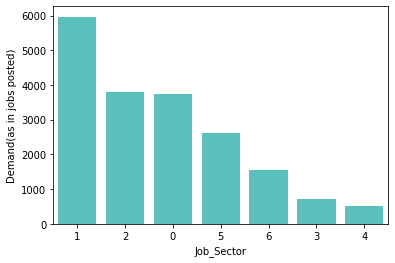

In [134]:
# Plotting Job Sector numbers
ax = sns.countplot(x = "Job_Sector",data = job_df,color= "mediumturquoise", order = job_df['Job_Sector'].value_counts().index  )
ax.set(ylabel="Demand(as in jobs posted)")
plt.show()

Implying that the highest Demands of job are in:<br>
1. Training Programmes
2. Software and Development
3. Project Management and Development

In [187]:
data = [job_df["Year"],job_df["Job_Sector"]]
headers = ["Year", "Job_Sector"]
plot_job_sector = pd.concat(data, axis=1, keys=headers)
 
plot_job_sector = plot_job_sector.pivot_table(index=plot_job_sector.Year,columns=plot_job_sector.Job_Sector,aggfunc=len)
plot_job_sector

Job_Sector,0,1,2,3,4,5,6
Year,,,,,,,
2004,293,293,152,31,19,39,47
2005,265,461,198,37,19,71,85
2006,211,405,176,48,42,112,115
2007,231,518,288,48,74,202,173
2008,317,574,328,48,40,310,162
2009,243,425,140,58,27,194,93
2010,314,494,244,62,41,199,119
2011,289,494,359,77,53,284,134
2012,392,639,487,89,64,337,129


In [189]:
xaxis = job_df.Job_Sector.unique().tolist()
xaxis

[4, 6, 0, 1, 2, 5, 3]

In [196]:
list(plot_job_sector.T[2004])

[293, 293, 152, 31, 19, 39, 47]

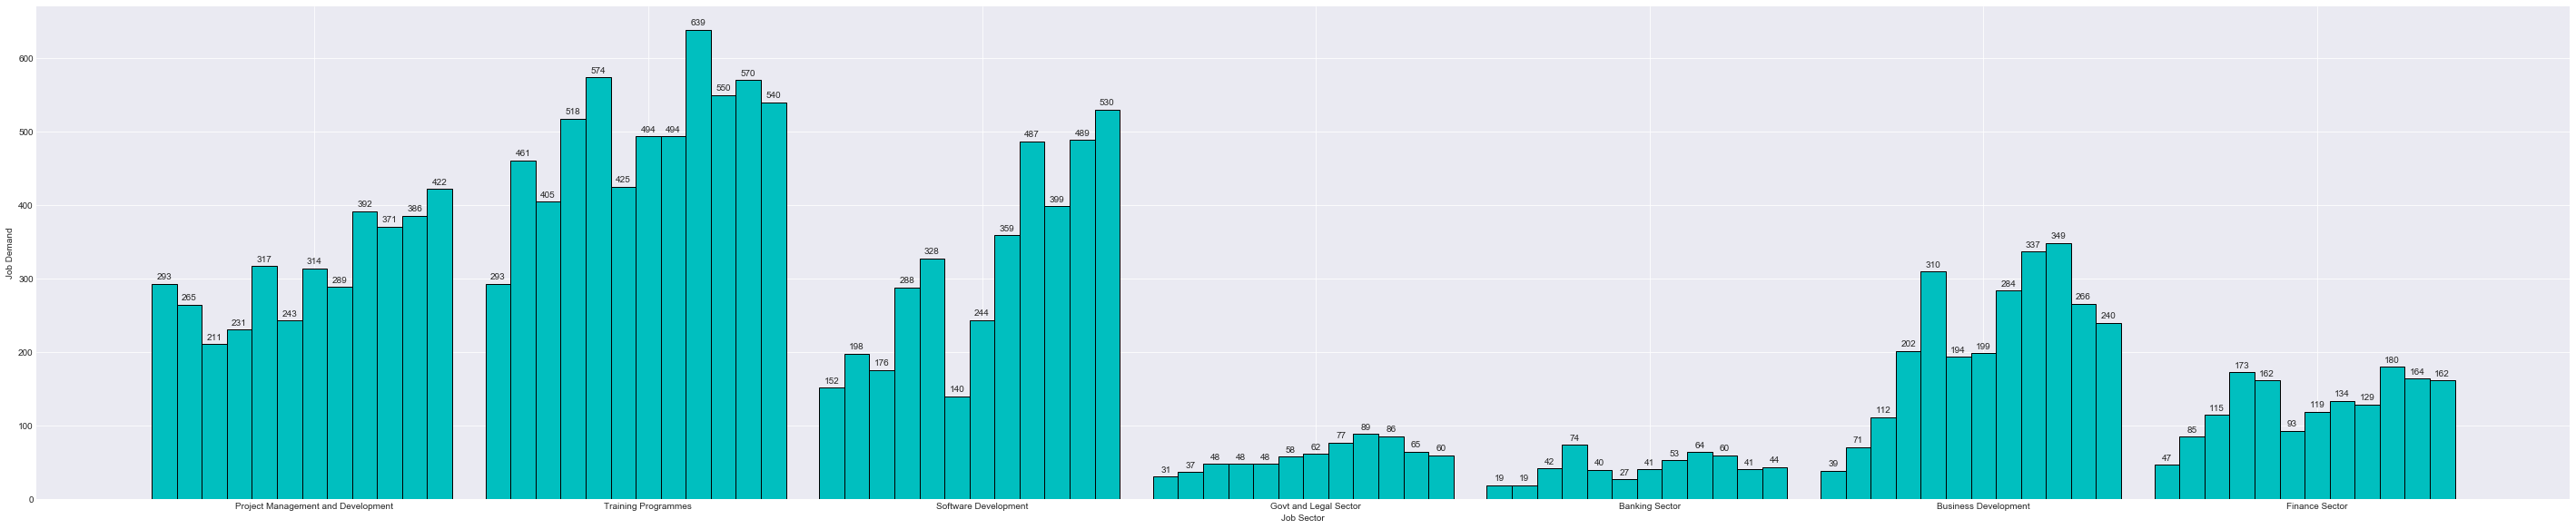

In [254]:
# Plotting Changes over time

xaxis = [0,1,2,3,4,5,6]
indx = np.arange(len(xaxis))

_2004_cnt = list(plot_job_sector.T[2004])
_2005_cnt = list(plot_job_sector.T[2005])
_2006_cnt = list(plot_job_sector.T[2006])
_2007_cnt = list(plot_job_sector.T[2007])
_2008_cnt = list(plot_job_sector.T[2008])
_2009_cnt = list(plot_job_sector.T[2009])
_2010_cnt = list(plot_job_sector.T[2010])
_2011_cnt = list(plot_job_sector.T[2011])
_2012_cnt = list(plot_job_sector.T[2012])
_2013_cnt = list(plot_job_sector.T[2013])
_2014_cnt = list(plot_job_sector.T[2014])
_2015_cnt = list(plot_job_sector.T[2015])

bar_width = 0.075

# Set position of bar on X axis
r1 = indx
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
r6 = [x + bar_width for x in r5]
r7 = [x + bar_width for x in r6]
r8 = [x + bar_width for x in r7]
r9 = [x + bar_width for x in r8]
r10 = [x + bar_width for x in r9]
r11 = [x + bar_width for x in r10]
r12 = [x + bar_width for x in r11]

fig, ax = plt.subplots(figsize=(50,10))

bar2004 = ax.bar(r1, _2004_cnt, bar_width, color = 'c',edgecolor='k')
bar2005 = ax.bar(r2, _2005_cnt, bar_width, color = 'c',edgecolor='k')
bar2006 = ax.bar(r3, _2006_cnt, bar_width, color = 'c',edgecolor='k')
bar2007 = ax.bar(r4, _2007_cnt, bar_width, color = 'c',edgecolor='k')
bar2008 = ax.bar(r5, _2008_cnt, bar_width, color = 'c',edgecolor='k')
bar2009 = ax.bar(r6, _2009_cnt, bar_width, color = 'c',edgecolor='k')
bar2010 = ax.bar(r7, _2010_cnt, bar_width, color = 'c',edgecolor='k')
bar2011 = ax.bar(r8, _2011_cnt, bar_width, color = 'c',edgecolor='k')
bar2012 = ax.bar(r9, _2012_cnt, bar_width, color = 'c',edgecolor='k')
bar2013 = ax.bar(r10, _2013_cnt, bar_width, color = 'c',edgecolor='k')
bar2014 = ax.bar(r11, _2014_cnt, bar_width, color = 'c',edgecolor='k')
bar2015 = ax.bar(r12, _2015_cnt, bar_width, color = 'c',edgecolor='k')


def insert_data_labels(bars):
    for bar in bars:
        bar_height = bar.get_height()
        ax.annotate('{0:.0f}'.format(bar.get_height()),
            xy=(bar.get_x() + bar.get_width() / 2, bar_height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center',
                    va='bottom'
        )

insert_data_labels(bar2004)
insert_data_labels(bar2005)
insert_data_labels(bar2006)
insert_data_labels(bar2007)
insert_data_labels(bar2008)
insert_data_labels(bar2009)
insert_data_labels(bar2010)
insert_data_labels(bar2011)
insert_data_labels(bar2012)
insert_data_labels(bar2013)
insert_data_labels(bar2014)
insert_data_labels(bar2015)

# inserting x axis ticks
plt.xticks(ticks=[r + (6*bar_width) for r in range(len(xaxis))],labels=["Project Management and Development","Training Programmes","Software Development","Govt and Legal Sector","Banking Sector","Business Development","Finance Sector"])

# inserting x and y axis label
ax.set(xlabel = "Job Sector", ylabel="Job Demand",format={})


plt.show()

In [255]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
0     -29.594002  60.112713       1        1  27.372221
1     -45.996586  11.891685       2        1  22.129064
2      20.368856  70.019325       3        1  15.588352
5      53.928768  31.704309       4        1  12.491806
6     -12.437127 -26.423267       5        1   9.506668
3       3.965971  21.797720       6        1   7.528349
4      37.524284 -16.517805       7        1   5.383540, topic_info=     Category          Freq           Term         Total  loglift  logprob
2903  Default  11193.000000      financial  11193.000000  30.0000  30.0000
5672  Default  24536.000000        project  24536.000000  29.0000  29.0000
2071  Default  12681.000000         design  12681.000000  28.0000  28.0000
6618  Default  14954.000000       software  14954.000000  27.0000  27.0000
2106  Default  25456.000000    development  25456.000000  26.0000  26.0000
4059  Default  39132.000000      knowledge  39132.000000  25.0000  25.0000
7147  Default   8232.000000           test   8232.000000  24.0000  24.0000
168   Default   5486.000000     accounting   5486.000000  23.0000  23.0000
855   Default  10774.000000           bank  10774.000000  22.0000  22.0000
2998  Default   5934.000000           form   5934.000000  21.0000  21.0000
6274  Default   8610.000000           sale   8610.000000  20.0000  20.0000
1832  Default   4556.000000         credit   4556.000000  19.0000  19.0000
5085  Default  28152.000000   organization  28152.000000  18.0000  18.0000
4996  Default  14816.000000         office  14816.000000  17.0000  17.0000
163   Default   5260.000000        account   5260.000000  16.0000  16.0000
6059  Default  14325.000000         report  14325.000000  15.0000  15.0000
7766  Default   6746.000000            web   6746.000000  14.0000  14.0000
2103  Default   5113.000000      developer   5113.000000  13.0000  13.0000
2901  Default   5688.000000        finance   5688.000000  12.0000  12.0000
4172  Default   4436.000000          legal   4436.000000  11.0000  11.0000
5662  Default   3307.000000      programme   3307.000000  10.0000  10.0000
731   Default   3190.000000     attachment   3190.000000   9.0000   9.0000
1366  Default   8767.000000           cjsc   8767.000000   8.0000   8.0000
1888  Default   9641.000000       customer   9641.000000   7.0000   7.0000
5542  Default   8768.000000        prepare   8768.000000   6.0000   6.0000
7052  Default   2917.000000            tax   2917.000000   5.0000   5.0000
4856  Default   4942.000000        network   4942.000000   4.0000   4.0000
210   Default  11977.000000       activity  11977.000000   3.0000   3.0000
2968  Default   5671.000000         follow   5671.000000   2.0000   2.0000
1160  Default  23388.000000      candidate  23388.000000   1.0000   1.0000
...       ...           ...            ...           ...      ...      ...
4652   Topic7    952.113663        mission   1961.896135   2.1988  -5.2386
1032   Topic7   1393.244934         branch   3459.374653   2.0124  -4.8579
5466   Topic7    585.787655      portfolio   1078.111644   2.3118  -5.7243
6184   Topic7    976.985198           risk   2452.034627   2.0016  -5.2128
2903   Topic7   2496.192394      financial  11193.767485   1.4212  -4.2747
4996   Topic7   2730.934502         office  14816.705344   1.2307  -4.1849
5085   Topic7   3867.921446   organization  28152.586653   0.9369  -3.8368
5440   Topic7   1299.568062         policy   5509.631624   1.4774  -4.9275
1455   Topic7    496.572970     collection    964.598565   2.2578  -5.8895
2379   Topic7    807.515510       economic   2659.199976   1.7300  -5.4033
5723   Topic7   1751.119490        provide  15640.518004   0.7322  -4.6292
2901   Topic7   1098.045552        finance   5688.583894   1.2769  -5.0960
210    Topic7   1504.698962       activity  11977.399765   0.8474  -4.7809
760    Topic7    698.616308          audit   2506.012272   1.6445  -5.5482
438

### Conclusion:

#### Changes over time:
Overall, It is evident that over the years the Job demands have gone down. But the <font color="green">**Software Development**</font> and <font color="green">**Project Management**</font> industry is growing relatively well. In comparison <font color="red">**Business Development**</font> isn't faring well.

#### Topic Distribution:
Topics are fairly distributed with no overlapping and clear distinction

## Section 2: What are the Desired Characteristic and Skill sets for a candidate? How has that changed over time?

We will look at the column of **Required Qualification** for this exercise. And we will utilise the method of **k-means clustering** to determine how skill sets are clustered together. We will then **plot the changes over time**.<br><br>
***Note: There are some entries without any Required Qualifications, these are mostly ads posted for a higher education program or seminars. We will be ignoring these as part of this analysis***

In [310]:
# subsetting a new dataframe that only contains rows where we have non-empty qualification string
required_qual = job_df[job_df["RequiredQual"] != '']

In [311]:
RequiredQual_clean = required_qual["RequiredQual_tkn"].apply(lambda x: ' '.join(x))
RequiredQual_clean.head()

orig_index
0    high economical technical education credit ban...
1    year professional credit banking system case h...
2    master degree preferably finance accounting au...
3    university degree progressively responsible fi...
4    high legal education least year relevant stron...
Name: RequiredQual_tkn, dtype: object

In [312]:
# Adding some more stop words specific to Required Qualification field
my_stop_words = ['good','personality','strong','skill','skills','excellent','knowledge','ability','year','standard','plus']

vectorizer = TfidfVectorizer(min_df = 0.05, max_df=0.7,
                             ngram_range=(1, 2), 
                             stop_words= my_stop_words)
vectorizer.fit(RequiredQual_clean)


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.7, max_features=None,
                min_df=0.05, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words=['good', 'personality', 'strong', 'skill', 'skills',
                            'excellent', 'knowledge', 'ability', 'year',
                            'standard', 'plus'],
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

In [313]:
tf_idf_qual = vectorizer.transform(RequiredQual_clean)

In [314]:
# Using the elbow method to determine the ideal number of clusters
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(tf_idf_qual)
    Sum_of_squared_distances.append(km.inertia_)

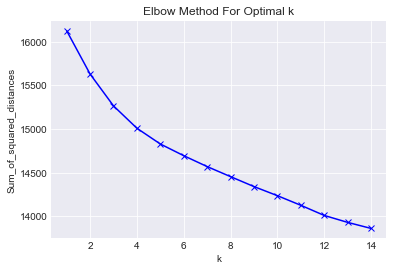

In [315]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

The bend is coming at 5, hence we will consider 5 cluster for our analysis.

In [322]:
km = KMeans(n_clusters=4, init='k-means++', max_iter=100, n_init=1,random_state=42)

%time km.fit(tf_idf_qual)
clusters = km.labels_.tolist()
clusters

Wall time: 7.62 s


[3,
 3,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 3,
 3,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 3,
 3,
 3,
 1,
 1,
 1,
 3,
 1,
 0,
 1,
 0,
 1,
 3,
 0,
 1,
 3,
 1,
 1,
 1,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 3,
 1,
 3,
 3,
 3,
 2,
 1,
 1,
 3,
 1,
 1,
 2,
 3,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 2,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 0,
 1,
 2,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 1,
 3,
 3,
 0,
 3,
 1,
 1,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 1,


In [323]:
len(clusters)

18459

In [324]:
required_qual["qual_cluster"] = clusters
required_qual.head()

,jobpost,Title,Company,Location,JobDescription,JobRequirment,RequiredQual,AboutC,Year,Month,IT,JobDescription_tkn,JobRequirment_tkn,RequiredQual_tkn,AboutC_tkn,jobpost_tkn,Company_tkn,Title_tkn,Job_Sector,qual_cluster
orig_index,,,,,,,,,,,,,,,,,,,,
0,"""""Aregak"" Universal Credit Organization"" CJSC\...",Accountant,"""""Aregak"" Universal Credit Organization"" CJSC","Martuni, Armenia","""Aregak"" UCO is seeking an Accountant to carry...",- Realize initial accounting documentation in ...,- Higher economical or technical education;\n-...,Aregak was established in 1997 by United Metho...,2008,4,False,"[aregak, uco, accountant, carry, accountancy, ...","[realize, initial, accounting, documentation, ...","[high, economical, technical, education, credi...","[aregak, united, methodist, committee, relief,...","[aregak, universal, credit, organization, cjsc...","[aregak, universal, credit, organization, cjsc]",[accountant],4,3
1,"""""Aregak"" Universal Credit Organization"" CJSC\...",Branch Manager,"""""Aregak"" Universal Credit Organization"" CJSC","Ashtarak, Armenia",Aregak UCO is seeking a Manager to organize an...,- Realize administrative and operational manag...,- 2 years of professional experience in credit...,Aregak has started its activity as a microcred...,2009,5,False,"[aregak, uco, manager, organize, manage, activ...","[realize, administrative, operational, managem...","[year, professional, credit, banking, system, ...","[aregak, start, activity, microcredit, program...","[aregak, universal, credit, organization, cjsc...","[aregak, universal, credit, organization, cjsc]","[branch, manager]",4,3
2,"""""Aregak"" Universal Credit Organization"" CJSC\...",Controller,"""""Aregak"" Universal Credit Organization"" CJSC","Yerevan, Armenia",This is an entry level position for a candidat...,- Make analysis of the Organizations operation...,- Master's degree preferably in Finance/ Accou...,AREGAK Universal Credit Organization CJSC was ...,2011,8,False,"[entry, level, candidate, year, audit, control...","[make, analysis, organization, operation, prov...","[master, degree, preferably, finance, accounti...","[aregak, universal, credit, organization, cjsc...","[aregak, universal, credit, organization, cjsc...","[aregak, universal, credit, organization, cjsc]",[controller],4,1
3,"""""Aregak"" Universal Credit Organization"" CJSC\...",Controller,"""""Aregak"" Universal Credit Organization"" CJSC","Yerevan, Armenia",The Controller conducts oversight of the Organ...,- Make analysis of the Organizations financial...,- University degree with progressively respons...,Aregak Universal Credit Organization CJSC was ...,2011,5,False,"[controller, conduct, oversight, organization,...","[make, analysis, organization, financial, stat...","[university, degree, progressively, responsibl...","[aregak, universal, credit, organization, cjsc...","[aregak, universal, credit, organization, cjsc...","[aregak, universal, credit, organization, cjsc]",[controller],4,1
4,"""""Aregak"" Universal Credit Organization"" CJSC\...",Delinquent Credits Collection Agent,"""""Aregak"" Universal Credit Organization"" CJSC","Armavir Region, Armenia",The Delinquent Credits Collection Agent will w...,- Implement the legal activities of the branch...,- Higher legal education;\n- At least 2 years ...,Aregak Universal Credit Organization CJSC was ...,2011,11,False,"[delinquent, credit, collection, agent, armavi...","[implement, legal, activity, branch, office, c...","[high, legal, education, least, year, relevant...","[aregak, universal, credit, organization, cjsc...","[aregak, universal, credit, organization, cjsc...","[aregak, universal, credit, organization, cjsc]","[delinquent, credit, collection, agent]",4,3


In [325]:
tf_idf_norm = normalize(tf_idf_qual)
tf_idf_array = tf_idf_norm.toarray()

pd.DataFrame(tf_idf_array, columns=vectorizer.get_feature_names()).head()

,account,accounting,administration,advance,advantage,analysis,analytical,application,area,asset,...,web,well,willingness,within,word,word excel,work,write,write communication,write spoken
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.216231,0.0,...,0.0,0.000000,0.0,0.0,0.172545,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.189297,0.0,0.0,0.171325,0.0,0.0,0.0,0.0,0.0
2,0.326158,0.539326,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.315223,0.260622,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.287624,0.0,0.0,0.260317,0.0,0.0,0.0,0.0,0.0


In [326]:
prediction = km.predict(tf_idf_array)

In [327]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs
dfs = get_top_features_cluster(tf_idf_array, prediction, 20)

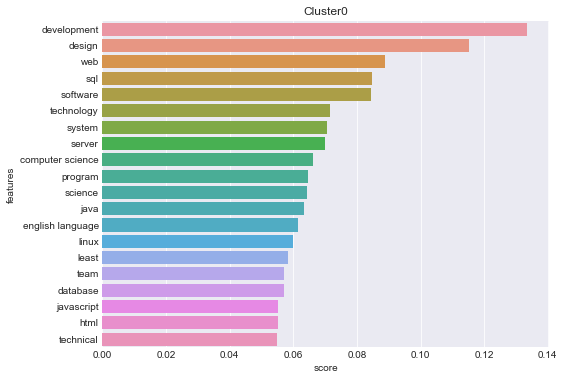

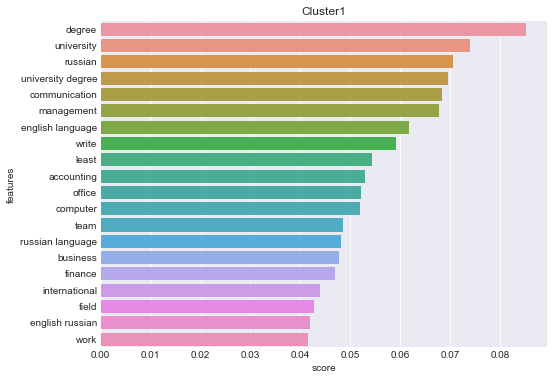

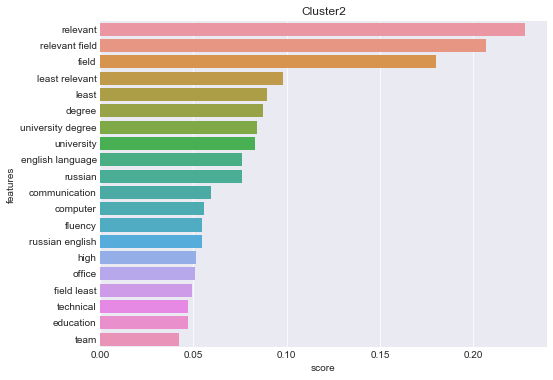

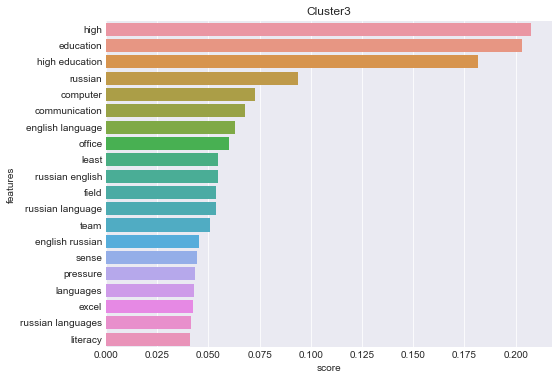

In [328]:
for i in range(0,4):
    plt.figure(figsize=(8,6))
    chart_title = "Cluster" + str(i)
    plt.title(chart_title)
    sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:20])

### Cluster definition:
 - **Cluster 0:** Software Development Technical skill
 - **Cluster 1:** Finance Degree
 - **Cluster 2:** University Degree with Language and Computer basic requirements (Mostly for Business and Project Development sector)
 - **Cluster 3:** Fluent Communication in multiple languages (Mostly for training and outreach programmes)

In [329]:
data = [required_qual["Year"],required_qual["qual_cluster"]]
headers = ["Year", "qual_cluster"]
plot_job_sector = pd.concat(data, axis=1, keys=headers)
 
plot_job_sector = plot_job_sector.pivot_table(index=plot_job_sector.Year,columns=plot_job_sector.qual_cluster,aggfunc=len)
plot_job_sector

qual_cluster,0,1,2,3
Year,,,,
2004,150,493,66,106
2005,236,560,103,192
2006,215,539,118,205
2007,304,783,135,272
2008,369,887,173,297
2009,194,645,130,182
2010,278,749,134,277
2011,409,712,156,380
2012,544,919,202,453


In [331]:
xaxis = required_qual.qual_cluster.unique().tolist()
xaxis

[3, 1, 0, 2]

In [332]:
list(plot_job_sector.T[2004])

[150, 493, 66, 106]

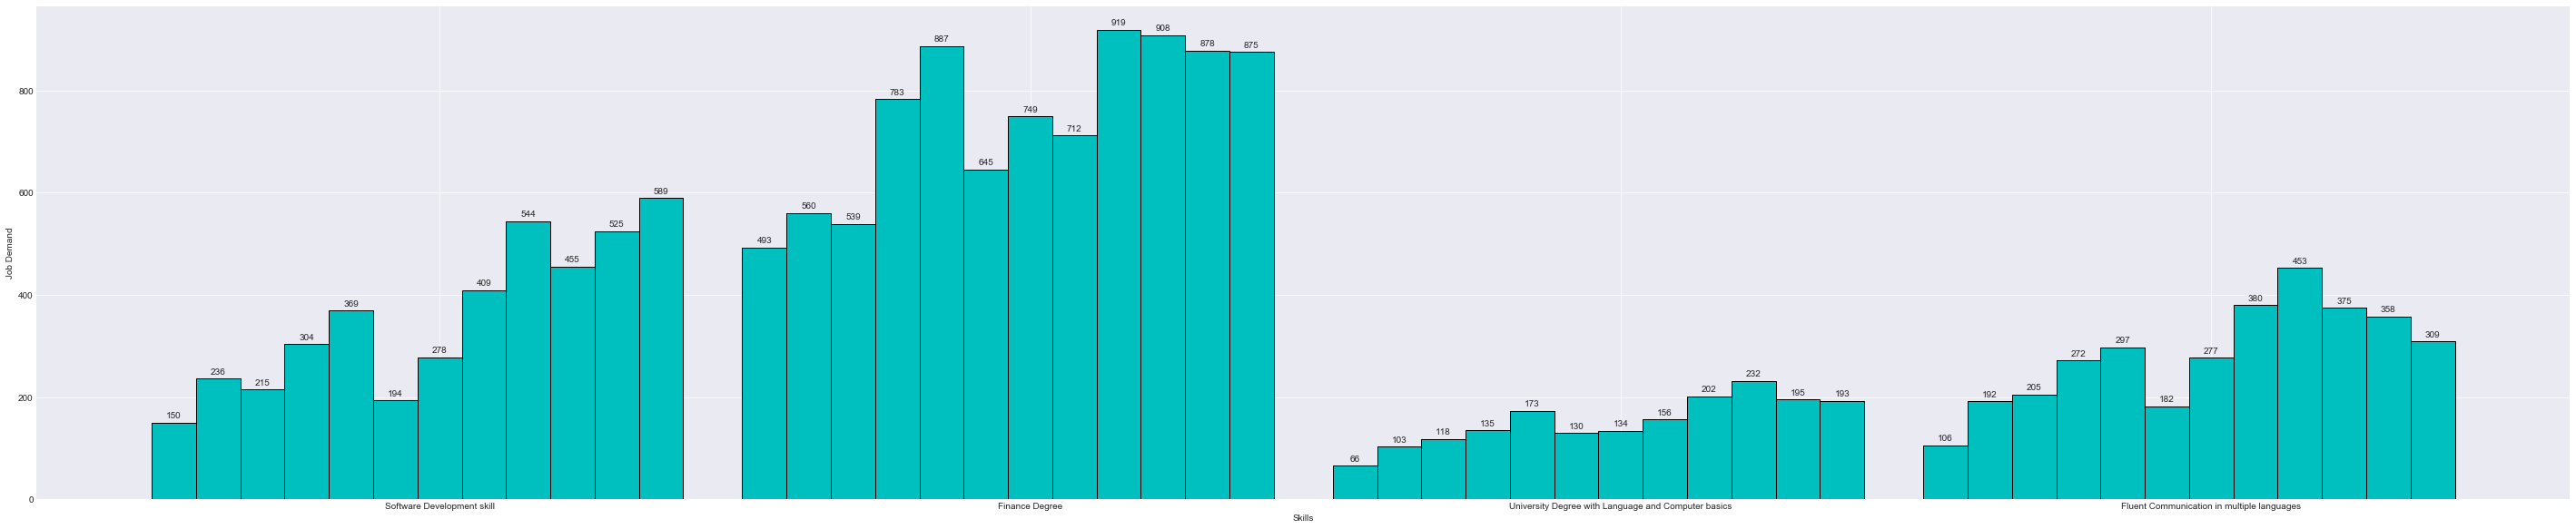

In [334]:
# Plotting Changes over time

xaxis = [0,1,2,3]
indx = np.arange(len(xaxis))

_2004_cnt = list(plot_job_sector.T[2004])
_2005_cnt = list(plot_job_sector.T[2005])
_2006_cnt = list(plot_job_sector.T[2006])
_2007_cnt = list(plot_job_sector.T[2007])
_2008_cnt = list(plot_job_sector.T[2008])
_2009_cnt = list(plot_job_sector.T[2009])
_2010_cnt = list(plot_job_sector.T[2010])
_2011_cnt = list(plot_job_sector.T[2011])
_2012_cnt = list(plot_job_sector.T[2012])
_2013_cnt = list(plot_job_sector.T[2013])
_2014_cnt = list(plot_job_sector.T[2014])
_2015_cnt = list(plot_job_sector.T[2015])

bar_width = 0.075

# Set position of bar on X axis
r1 = indx
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
r6 = [x + bar_width for x in r5]
r7 = [x + bar_width for x in r6]
r8 = [x + bar_width for x in r7]
r9 = [x + bar_width for x in r8]
r10 = [x + bar_width for x in r9]
r11 = [x + bar_width for x in r10]
r12 = [x + bar_width for x in r11]

fig, ax = plt.subplots(figsize=(50,10))

bar2004 = ax.bar(r1, _2004_cnt, bar_width, color = 'c',edgecolor='k')
bar2005 = ax.bar(r2, _2005_cnt, bar_width, color = 'c',edgecolor='k')
bar2006 = ax.bar(r3, _2006_cnt, bar_width, color = 'c',edgecolor='k')
bar2007 = ax.bar(r4, _2007_cnt, bar_width, color = 'c',edgecolor='k')
bar2008 = ax.bar(r5, _2008_cnt, bar_width, color = 'c',edgecolor='k')
bar2009 = ax.bar(r6, _2009_cnt, bar_width, color = 'c',edgecolor='k')
bar2010 = ax.bar(r7, _2010_cnt, bar_width, color = 'c',edgecolor='k')
bar2011 = ax.bar(r8, _2011_cnt, bar_width, color = 'c',edgecolor='k')
bar2012 = ax.bar(r9, _2012_cnt, bar_width, color = 'c',edgecolor='k')
bar2013 = ax.bar(r10, _2013_cnt, bar_width, color = 'c',edgecolor='k')
bar2014 = ax.bar(r11, _2014_cnt, bar_width, color = 'c',edgecolor='k')
bar2015 = ax.bar(r12, _2015_cnt, bar_width, color = 'c',edgecolor='k')


def insert_data_labels(bars):
    for bar in bars:
        bar_height = bar.get_height()
        ax.annotate('{0:.0f}'.format(bar.get_height()),
            xy=(bar.get_x() + bar.get_width() / 2, bar_height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center',
                    va='bottom'
        )

insert_data_labels(bar2004)
insert_data_labels(bar2005)
insert_data_labels(bar2006)
insert_data_labels(bar2007)
insert_data_labels(bar2008)
insert_data_labels(bar2009)
insert_data_labels(bar2010)
insert_data_labels(bar2011)
insert_data_labels(bar2012)
insert_data_labels(bar2013)
insert_data_labels(bar2014)
insert_data_labels(bar2015)

# inserting x axis ticks
plt.xticks(ticks=[r + (6*bar_width) for r in range(len(xaxis))],labels=["Software Development skill","Finance Degree","University Degree with Language and Computer basics","Fluent Communication in multiple languages"])

# inserting x and y axis label
ax.set(xlabel = "Skills", ylabel="Job Demand")


plt.show()

### Cluster Conclusion:
Over the years, the demand of <font color = green>**Software Developers**</font> are increasing, but jobs pertaining solely to <font color = red>**Fluent communication**</font> is declining. What with the advent of Google translator :D<br>

Also jobs in Finance sector are holding a steady demand as this is also an industry that requires some amount of domain knowledge and higher education.

## Section 3: Classify whether job is IT or not
We will use **Multinomial Naive Bayes** to classify our data. Also we will be utilizing the column "jobpost" for this analysis, since it contains all the required description and skill requirements. 

In [18]:
clss_df = pd.concat([job_df["jobpost_tkn"],job_df["IT"]],axis =1)
clss_df.head()

,jobpost_tkn,IT
orig_index,,
0,"[aregak, universal, credit, organization, cjsc...",False
1,"[aregak, universal, credit, organization, cjsc...",False
2,"[aregak, universal, credit, organization, cjsc...",False
3,"[aregak, universal, credit, organization, cjsc...",False
4,"[aregak, universal, credit, organization, cjsc...",False


In [19]:
clss_df["jobpost_tkn"] = clss_df["jobpost_tkn"].apply(lambda x: ' '.join(x))
clss_df["IT"] = clss_df["IT"].apply(lambda x: 0 if x == False else 1 )
clss_df.head()

,jobpost_tkn,IT
orig_index,,
0,aregak universal credit organization cjsc acco...,0
1,aregak universal credit organization cjsc bran...,0
2,aregak universal credit organization cjsc cont...,0
3,aregak universal credit organization cjsc cont...,0
4,aregak universal credit organization cjsc deli...,0


In [20]:
# Stop words for jobpost column
my_stop_words = ['good','personality','strong','skill','skills','excellent','knowledge','ability','year','standard','plus','ltd','open']

# define X and y
X = clss_df.jobpost_tkn
y = clss_df.IT


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

vect = TfidfVectorizer(ngram_range=(1,2), max_df=0.7, min_df=10, stop_words=my_stop_words)
# learn training data vocabulary, then create document-term matrix
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)

In [22]:
dtm = pd.DataFrame(X_train_dtm.toarray(), columns=vect.get_feature_names())
print(dtm.shape)
print(y_train.shape)

(15108, 45348)
(15108,)


In [23]:
# train a Naive Bayes model
nb = MultinomialNB()

nb.fit(dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [26]:
y_pred_class_train = nb.predict(dtm)
print("------------- Training Clasification Metrics Report ------------------")
print(metrics.classification_report(y_train, y_pred_class_train))

------------- Training Clasification Metrics Report ------------------
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     12074
           1       0.79      0.81      0.80      3034

    accuracy                           0.92     15108
   macro avg       0.87      0.88      0.87     15108
weighted avg       0.92      0.92      0.92     15108



In [25]:
X_test_dtm = vect.transform(X_test)
y_pred_class_test = nb.predict(X_test_dtm.toarray())

In [28]:
print("------------------------- Test: Accuracy Score ------------------------")
print(metrics.accuracy_score(y_test, y_pred_class_test))
print("----------------------- Test: Confusion Matrix ------------------------")
print(metrics.confusion_matrix(y_test, y_pred_class_test))
print("----------------- Test Clasification Metrics Report -------------------")
print(metrics.classification_report(y_test, y_pred_class_test))

------------------------- Test: Accuracy Score ------------------------
0.9126521969295924
----------------------- Test: Confusion Matrix ------------------------
[[2878  186]
 [ 144  570]]
----------------- Test Clasification Metrics Report -------------------
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      3064
           1       0.75      0.80      0.78       714

    accuracy                           0.91      3778
   macro avg       0.85      0.87      0.86      3778
weighted avg       0.91      0.91      0.91      3778



Classifier is reasonably accurate in deciding whether a job posting is for IT or not with **91%** accuracy.<br>
#### We will try it out below by taking two absolutely new post from updated Kaggle dataset of Armenia Job posts. These posts are from 2017, so not part of this dataset

In [29]:
new_df = pd.read_csv("New_post_2017.csv")
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
jobpost    2 non-null object
IT         2 non-null bool
dtypes: bool(1), object(1)
memory usage: 98.0+ bytes


In [30]:
# Preprocessing of the data to be able to predict on it

#1. Clean and tokenize the jobpost column
new_df["jobpost_tkn"] = new_df["jobpost"].apply(lambda x: clean_texts(x))
new_df["jobpost_tkn"] = new_df["jobpost_tkn"].apply(lambda x: ' '.join(x))

#2. Sub the IT column from bool to int
new_df["IT"] = new_df["IT"].apply(lambda x: 0 if x == False else 1 )

new_df.head()

,jobpost,IT,jobpost_tkn
0,World Vision Armenia\nTITLE: Health Manager (...,0,world vision health manager advertisement yere...
1,Webb Fontaine Armenia\nTITLE: Junior QA Java ...,1,webb fontaine junior java developer term full ...


In [31]:
#Split test data in X and Y
X_test = new_df.jobpost_tkn
y_test = new_df.IT

#Vectorize the test dataset
X_test_dtm = vect.transform(X_test)
y_pred_class_test = nb.predict(X_test_dtm.toarray())

In [32]:
print("------------------------- Test: Accuracy Score ------------------------")
print(metrics.accuracy_score(y_test, y_pred_class_test))
print("----------------------- Test: Confusion Matrix ------------------------")
print(metrics.confusion_matrix(y_test, y_pred_class_test))
print("----------------- Test Clasification Metrics Report -------------------")
print(metrics.classification_report(y_test, y_pred_class_test))

------------------------- Test: Accuracy Score ------------------------
1.0
----------------------- Test: Confusion Matrix ------------------------
[[1 0]
 [0 1]]
----------------- Test Clasification Metrics Report -------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



It worked out great on a completely new post!

## Section 4: Given a title, find top 5 similar jobs using the jobpost
We will be utilising the **cosine similarity** metric in **TF-IDF model** for this analysis.

In [46]:
df_similar_job = job_df[['Title','jobpost','Title_tkn','jobpost_tkn']]
df_similar_job["jobpost_str_clean"] = df_similar_job["jobpost_tkn"].apply(lambda x: ' '.join(x))
df_similar_job["Title_str_clean"] = df_similar_job["Title_tkn"].apply(lambda x: ' '.join(x))
df_similar_job.head()

,Title,jobpost,Title_tkn,jobpost_tkn,jobpost_str_clean,Title_str_clean
orig_index,,,,,,
0,Accountant,"""""Aregak"" Universal Credit Organization"" CJSC\...",[accountant],"[aregak, universal, credit, organization, cjsc...",aregak universal credit organization cjsc acco...,accountant
1,Branch Manager,"""""Aregak"" Universal Credit Organization"" CJSC\...","[branch, manager]","[aregak, universal, credit, organization, cjsc...",aregak universal credit organization cjsc bran...,branch manager
2,Controller,"""""Aregak"" Universal Credit Organization"" CJSC\...",[controller],"[aregak, universal, credit, organization, cjsc...",aregak universal credit organization cjsc cont...,controller
3,Controller,"""""Aregak"" Universal Credit Organization"" CJSC\...",[controller],"[aregak, universal, credit, organization, cjsc...",aregak universal credit organization cjsc cont...,controller
4,Delinquent Credits Collection Agent,"""""Aregak"" Universal Credit Organization"" CJSC\...","[delinquent, credit, collection, agent]","[aregak, universal, credit, organization, cjsc...",aregak universal credit organization cjsc deli...,delinquent credit collection agent


In [48]:
# Creating TF-IDF vector for jobpost. Since we are to determine job similarity based on jobpost.
# using the vect TfidfVectorizer created in previous section

tfidf_jobpost = vect.fit_transform(df_similar_job["jobpost_str_clean"])

In [51]:
# function to find top 5 jobs similar to what title we shall input
def find_similar_jobs_cosine_dst(index, top_n = 5):
    jobpost_tfidf_cosine = cosine_similarity(tfidf_jobpost[index:index+1], tfidf_jobpost).flatten()
    
    # Find top related docs to the provided index
    related_docs_indices = [i for i in jobpost_tfidf_cosine.argsort()[::-1] if i != index]
    return [(index, jobpost_tfidf_cosine[index]) for index in related_docs_indices][0:top_n]

In [61]:
def print_similar_job(idx):
    print("--------- Title for which you need similarity --------")
    print(df_similar_job.iloc[idx])
    print("--------- Jobs similar to above --------")
    for index, score in find_similar_jobs_cosine_dst(idx):
        print(df_similar_job.iloc[index])
        print("SIMILARITY SCORE: ", score)
        print("----------------------------------------------------------")

In [67]:
# User input will be taken to give top 5 jobs related to that post
idx = input("Which is the index you want to test for? ")
idx = int(idx)
print_similar_job(idx)

Which is the index you want to test for? 45
--------- Title for which you need similarity --------
Title                                                    Sales Manager
jobpost              "Aghveran Inc" Armenian Branch\nTITLE:  Sales ...
Title_tkn                                              [sale, manager]
jobpost_tkn          [aghveran, inc, branch, sale, manager, open, e...
jobpost_str_clean    aghveran inc branch sale manager open eligibil...
Title_str_clean                                           sale manager
Name: 45, dtype: object
--------- Jobs similar to above --------
Title                                                    Sales Manager
jobpost              Park Resort Aghveran\nTITLE:  Sales Manager\nT...
Title_tkn                                              [sale, manager]
jobpost_tkn          [park, resort, aghveran, sale, manager, term, ...
jobpost_str_clean    park resort aghveran sale manager term full ti...
Title_str_clean                                        

The matches using cosine distance calculation are reasonably good.<br>
Indexes tried:
 - 11
 - 39
 - 16
 - 45